# Pick a target and energy that KDUQ should be fit to, and see if our prior looks somewhat similar

In [1]:
import numpy as np

In [2]:
neutron = (1, 0)
proton = (1, 1)

In [3]:
from jitr.reactions import ElasticReaction

In [4]:
from jitr.optical_potentials import kduq

In [5]:
import pickle

import elm

with open("./prior_distribution.pickle", "rb") as f:
    prior = pickle.load(f)
prior_samples = elm.elm.array_to_list(prior.rvs(1000))

Using database version X4-2024-12-31 located in: /home/kyle/db/exfor/unpack_exfor-2024/X4-2024-12-31


In [6]:
target = (208, 82)
projectile = neutron
energy_lab = 35
rxn = ElasticReaction(target=target, projectile=projectile)

In [7]:
kduq_samples = kduq.get_samples_federal(projectile)

In [8]:
kinematics = rxn.kinematics(energy_lab)
kinematics

ChannelKinematics(Elab=35, Ecm=34.83103657194142, mu=np.float64(969.4312284969092), k=np.float64(1.305130762020223), eta=np.float64(0.0))

In [9]:
elm_prior_params = [
    elm.elm.calculate_parameters(projectile, target, kinematics.Ecm, rxn.Ef, p)
    for p in prior_samples
]

In [10]:
isoscalar, isovector, so0, so1, coul, asym = (
    np.array(l) for l in zip(*elm_prior_params)
)

In [11]:
np.mean(asym) * np.mean(isovector[0])

np.float64(1.1464178613303104)

In [12]:
kduq_params = [
    kduq.calculate_params(projectile, target, kinematics.Elab, p) for p in kduq_samples
]

In [13]:
kduq_coul, kduq_central, kduq_so = (np.array(l) for l in zip(*kduq_params))

In [14]:
np.mean(kduq_central, axis=0)

array([38.90670638,  7.1957479 ,  0.71487971,  3.31161616,  7.1957479 ,
        0.71487971,  4.95517375,  7.39212527,  0.57457236])

In [15]:
np.mean(isoscalar, axis=0)

array([41.60104451,  4.43696836,  7.29502765,  6.90779391,  0.72965038,
        6.90779391,  0.72965038])

In [16]:
np.mean(isovector, axis=0)

array([1.02311291e+01, 1.46711096e-02, 1.85685291e+01, 6.90731686e+00,
       7.28606033e-01, 6.90731686e+00, 7.28606033e-01])

In [17]:
np.mean(kduq_so, axis=0)

array([ 4.01925533,  6.50920067,  0.57430756, -0.11610853,  6.50920067,
        0.57430756])

In [18]:
np.mean(so0, axis=0)

array([5.58      , 0.        , 6.90779391, 0.72965038])

In [19]:
np.mean(so1, axis=0)

array([0.        , 0.        , 6.90731686, 0.72860603])

In [20]:
np.mean(coul, axis=0)

array([82.        ,  6.90779391])

In [21]:
np.mean(asym, axis=0)

np.float64(0.21153846153846154)

In [22]:
np.std(isoscalar, axis=0)

array([1.87681882, 2.33166382, 2.557736  , 0.2180077 , 0.0246645 ,
       0.2180077 , 0.0246645 ])

In [23]:
np.std(isovector, axis=0)

array([4.50327648, 2.9510064 , 7.26224164, 0.21593798, 0.02522436,
       0.21593798, 0.02522436])

In [24]:
np.std(so0, axis=0)

array([5.59552404e-14, 0.00000000e+00, 2.18007696e-01, 2.46644957e-02])

In [25]:
np.std(so1, axis=0)

array([0.        , 0.        , 0.21593798, 0.02522436])

In [26]:
np.std(coul, axis=0)

array([0.       , 0.2180077])

In [27]:
np.std(asym, axis=0)

np.float64(0.0)

In [28]:
r = np.linspace(0.1, 10, 100)
vso_kduq = kduq.spin_orbit(r, *np.mean(kduq_so, axis=0))
vso_elm = elm.elm.spin_orbit(r, 0, np.mean(so0, axis=0), np.mean(so1, axis=0))

In [29]:
from matplotlib import pyplot as plt

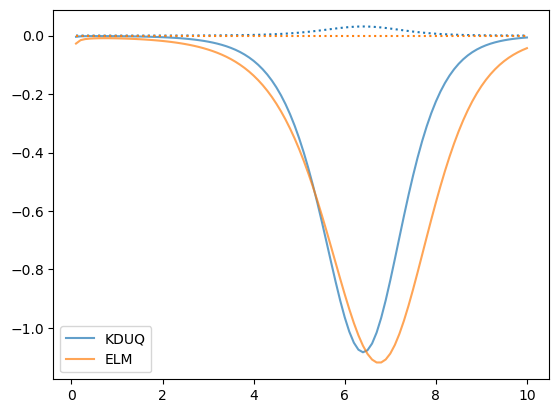

In [30]:
(p1,) = plt.plot(r, vso_kduq.real, alpha=0.7, label="KDUQ")
(p2,) = plt.plot(r, vso_elm.real, alpha=0.7, label="ELM")
plt.plot(r, vso_kduq.imag, ":", color=p1.get_color())
plt.plot(r, vso_elm.imag, ":", color=p2.get_color())

plt.legend()